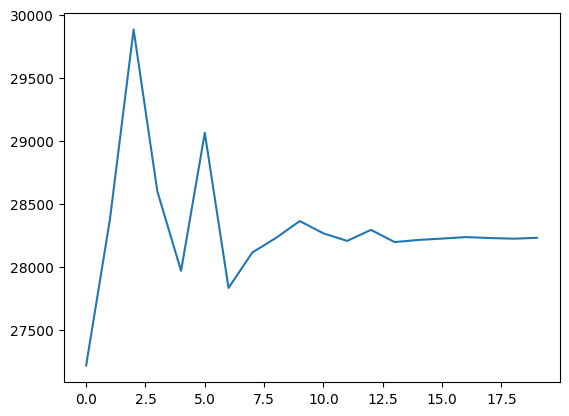

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from statsmodels.tsa.ar_model import AutoReg

sys.path.append('../')
from sglib.methods.parametric import AR


# Load the dataset
data = pd.read_csv('./example_data/usgs_daily_streamflow_cms.csv', index_col=0, parse_dates=True)

# Assume data is in a single column, adjust as necessary
streamflow_data = data.iloc[:, 1].resample('A').sum().values

# Instantiate and use the AR model
ar_model = AR(name="Streamflow AR Model", lag=(1,7))
ar_model.fit(streamflow_data)
generated_data = ar_model.generate(n=20)

plt.plot(generated_data)

In [3]:
pred = AutoReg(streamflow_data, lags=(1,2,3,4),
               trend='ct', seasonal=True, period=180).fit().predict(start=len(streamflow_data), end=len(streamflow_data)+1000)
plt.plot(pred)
plt.plot(streamflow_data, color= 'black')
plt.yscale('log')

ValueError: The model specification cannot be estimated. The model contains 78 regressors (2 trend, 179 seasonal, 4 lags) but after adjustment for hold_back and creation of the lags, there are only 69 data points available to estimate parameters.

In [26]:
streamflow_data

0       15.885751
1       14.668127
2       11.609907
3       12.516046
4       12.600997
          ...    
4743    23.871102
4744    20.473080
4745    18.434267
4746    20.812882
4747    32.564374
Name: USGS-01509000, Length: 4748, dtype: float64

In [ ]:
# Loading the example dataset for testing
data = pd.read_csv('/mnt/data/usgs_daily_streamflow_cms.csv')

# Selecting the first 3 columns assuming they are the sites for the VAR model
var_data = data.iloc[:, 1:4].values  # Adjust as necessary for the actual data columns

# Instantiate and use the VAR model with the selected data
var_model = VAR(name="Streamflow VAR Model", lag_order=2)
var_model.fit(var_data)
generated_data = var_model.generate(10)

# Displaying the generated data and plotting
generated_data, var_model.plot(generated_data)
